# Identified stream

In [1]:
import pyxdf
import numpy as np

# Load XDF file
streams, header = pyxdf.load_xdf('sub-P401\ses-S001\eeg\sub-P401_ses-S001_task-Default_run-001_eeg.xdf')
# Stream 1 is EMG
emg_stream = streams[0]
print(f"Stream 1 identified as EMG.")

# Identify Marker and RAW Time Series from Stream 2 and 3
stream_2 = streams[1]
stream_3 = streams[2]
def is_marker_stream(stream):
    """Check if a stream is Marker based on unique values (only 0 and 1 allowed)."""
    time_series = stream['time_series'].flatten()
    unique_values = np.unique(time_series)
    # Ensure that the stream only contains 0 and 1, and no other values
    if np.array_equal(unique_values, [0, 1]):
        return True
    return False

# Determine which stream is Marker and which is RAW Time Series
if is_marker_stream(stream_2):
    marker_stream = stream_2
    raw_time_stream = stream_3
    print(f"Stream 2 identified as Marker. \nStream 3 identified as RAW Time Series.")
else:
    marker_stream = stream_3
    raw_time_stream = stream_2
    print(f"Stream 2 identified as RAW Time Series. \nStream 3 identified as Marker. ")

# Display details
print("\nEMG Stream Details:")
print("Name:", emg_stream['info']['name'][0])
print("Type:", emg_stream['info']['type'][0])
print("Sampling Rate:", emg_stream['info']['nominal_srate'][0])
print("Time Series Shape:", emg_stream['time_series'].shape)
print("Time Stamps Shape:", len(emg_stream['time_stamps']))

print("\nMarker Stream Details:")
print("Name:", marker_stream['info']['name'][0])
print("Type:", marker_stream['info']['type'][0])
print("Sampling Rate:", marker_stream['info']['nominal_srate'][0])
print("Time Series Shape:", marker_stream['time_series'].shape)
print("Time Stamps Shape:", len(marker_stream['time_stamps']))

print("\nRAW Time Series Stream Details:")
print("Name:", raw_time_stream['info']['name'][0])
print("Type:", raw_time_stream['info']['type'][0])
print("Sampling Rate:", raw_time_stream['info']['nominal_srate'][0])
print("Time Series Shape:", raw_time_stream['time_series'].shape)
print("Time Stamps Shape:", len(raw_time_stream['time_stamps']))


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_3432\1021036144.py:5: SyntaxWarning: invalid escape sequence '\s'
  streams, header = pyxdf.load_xdf('sub-P401\ses-S001\eeg\sub-P401_ses-S001_task-Default_run-001_eeg.xdf')
Stream 3: Calculated effective sampling rate 55.2621 Hz is different from specified rate 250.0000 Hz.


Stream 1 identified as EMG.
Stream 2 identified as Marker. 
Stream 3 identified as RAW Time Series.

EMG Stream Details:
Name: obci_EMG
Type: EMG
Sampling Rate: 250
Time Series Shape: (11814, 8)
Time Stamps Shape: 11814

Marker Stream Details:
Name: obci_Marker
Type: EMG
Sampling Rate: 250
Time Series Shape: (53580, 1)
Time Stamps Shape: 53580

RAW Time Series Stream Details:
Name: obci_TimeRaW
Type: EMG
Sampling Rate: 250
Time Series Shape: (53570, 8)
Time Stamps Shape: 53570


# Plotgraph stream from data

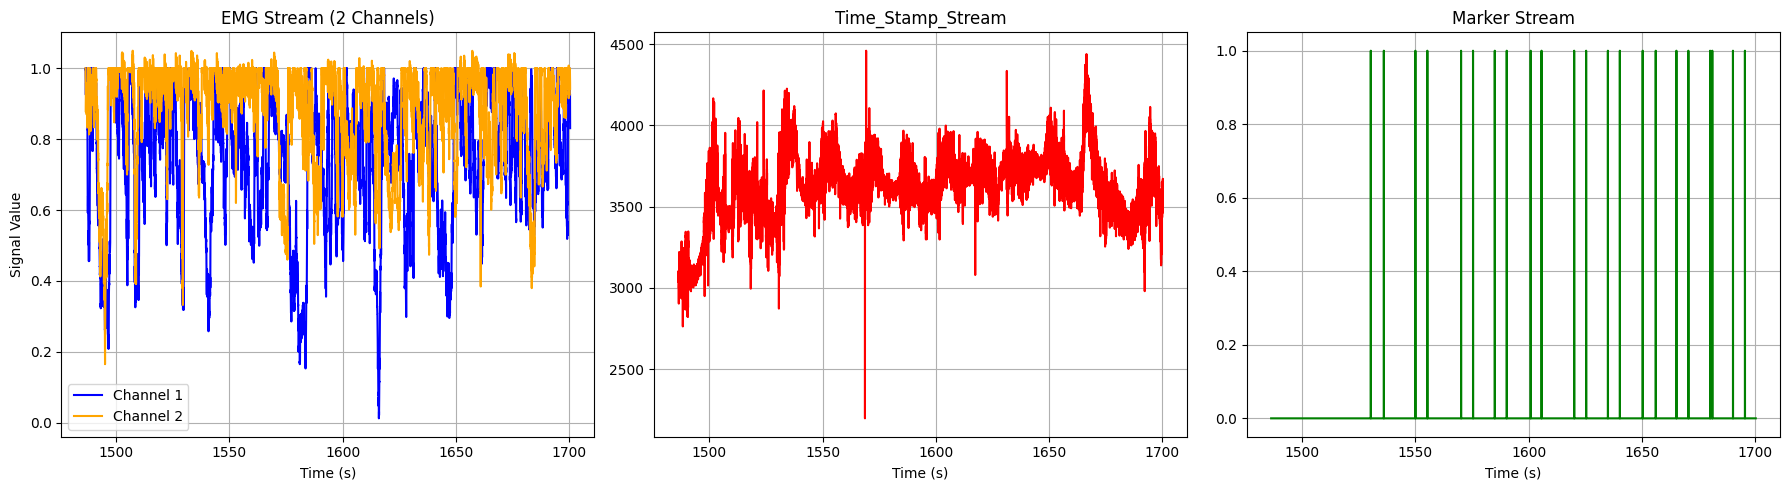

In [2]:
import matplotlib.pyplot as plt

# Stream EMG
time_stamps_EMG = emg_stream["time_stamps"]
time_series_EMG_ch1 = emg_stream["time_series"][:, 0] 
time_series_EMG_ch2 = emg_stream["time_series"][:, 2] 
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=False)
axs[0].plot(time_stamps_EMG, time_series_EMG_ch1, label="Channel 1", color="blue")
axs[0].plot(time_stamps_EMG, time_series_EMG_ch2, label="Channel 2", color="orange")
axs[0].set_title("EMG Stream (2 Channels)")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Signal Value")
axs[0].legend()
axs[0].grid()

# Stream Timeraw
time_stamps_Raw_time = raw_time_stream["time_stamps"]
time_series_Raw_time = raw_time_stream["time_series"][:, 0]  
axs[1].plot(time_stamps_Raw_time, time_series_Raw_time, color="red")
axs[1].set_title("Time_Stamp_Stream")
axs[1].set_xlabel("Time (s)")
axs[1].grid()

# Stream Marker
time_stamps_Marker = marker_stream["time_stamps"]
time_series_Marker = marker_stream["time_series"][:, 0]  
axs[2].plot(time_stamps_Marker, time_series_Marker, color="green")
axs[2].set_title("Marker Stream")
axs[2].set_xlabel("Time (s)")
axs[2].grid()

plt.tight_layout()
plt.show()

# Base graph setting

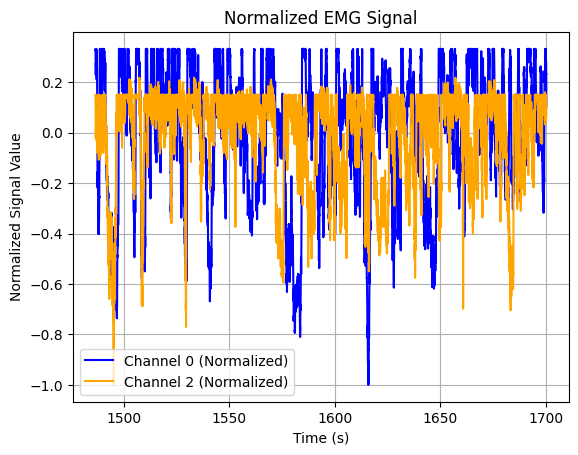

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ลบค่าเฉลี่ย
base_signal_ch0 = time_series_EMG_ch1 - np.mean(time_series_EMG_ch1)
base_signal_ch2 = time_series_EMG_ch2 - np.mean(time_series_EMG_ch2)

# Normalize สัญญาณให้มี scale เท่ากัน
base_signal_ch0 = base_signal_ch0 / np.max(np.abs(base_signal_ch0))  # Max Normalization
base_signal_ch2 = base_signal_ch2 / np.max(np.abs(base_signal_ch2))  # Max Normalization

# Plot สัญญาณ
plt.plot(time_stamps_EMG, base_signal_ch0, label="Channel 0 (Normalized)", color="blue")
plt.plot(time_stamps_EMG, base_signal_ch2, label="Channel 2 (Normalized)", color="orange")
plt.title("Normalized EMG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Normalized Signal Value")
plt.legend()
plt.grid()
plt.show()

### Band pass filter range frequency 20-125 Hz

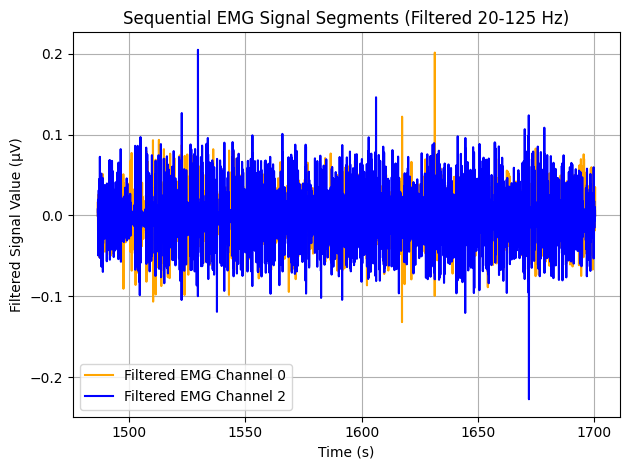

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# function Band-pass Filter
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # frequency Nyquist
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype="band")  # create band-pass
    y = filtfilt(b, a, data)  # use bandpass signal
    return y

# Parameters of band-pass filter
fs = 250  # Sampling rate = 250 Hz
lowcut = 20  # min band 20 Hz   
highcut = 124.9  # max band 125 Hz

# Apply band-pass filter to each channel of EMG
filtered_emg_ch0 = bandpass_filter(base_signal_ch0, lowcut, highcut, fs)
filtered_emg_ch2 = bandpass_filter(base_signal_ch2, lowcut, highcut, fs)

plt.plot(emg_stream["time_stamps"], filtered_emg_ch0, label="Filtered EMG Channel 0", color="orange")
plt.plot(emg_stream["time_stamps"], filtered_emg_ch2, label="Filtered EMG Channel 2", color="blue")
# plt.ylim(-1, 1)
plt.title("Sequential EMG Signal Segments (Filtered 20-125 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Filtered Signal Value (μV)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### Notch filter (50Hz) --Noise from wire

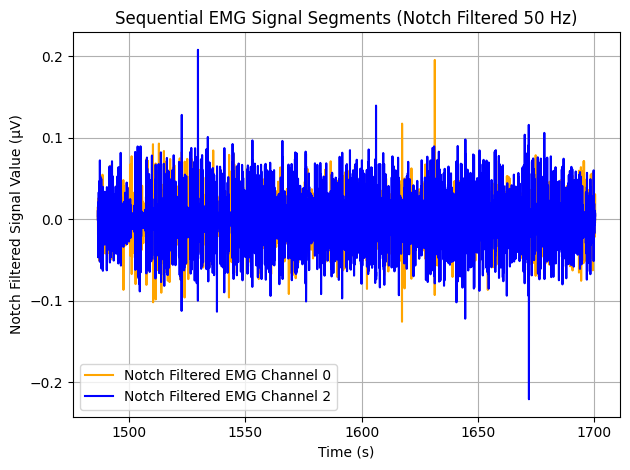

In [5]:
def notch_filter(data, freq, fs, quality_factor=30):
    nyquist = 0.5 * fs
    notch_freq = freq / nyquist
    b, a = butter(2, [notch_freq - 0.01, notch_freq + 0.01], btype='bandstop')
    y = filtfilt(b, a, data)
    return y

freq = 50  # noise frequency (50 Hz)
notch_signal_0 = notch_filter(filtered_emg_ch0, freq, fs)
notch_signal_2 = notch_filter(filtered_emg_ch2, freq, fs)

# plt.ylim(-1, 1)
plt.plot(emg_stream["time_stamps"], notch_signal_0, label="Notch Filtered EMG Channel 0", color="orange")
plt.plot(emg_stream["time_stamps"], notch_signal_2, label="Notch Filtered EMG Channel 2", color="blue")
plt.title("Sequential EMG Signal Segments (Notch Filtered 50 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Notch Filtered Signal Value (μV)")
plt.grid()
plt.legend()
plt.tight_layout()  


# Plotgraph marker point (Ch0 Left muscle)

ช่วงเวลาที่มี Marker ใหม่ภายในช่วง 5 วินาที:
Marker ที่ 1530.26 วินาที -> Marker ที่ 1536.03 วินาที ต่างกันอยู่ 5.76 วินาที
Marker ที่ 1549.96 วินาที -> Marker ที่ 1555.24 วินาที ต่างกันอยู่ 5.28 วินาที
Marker ที่ 1570.13 วินาที -> Marker ที่ 1575.42 วินาที ต่างกันอยู่ 5.29 วินาที
Marker ที่ 1585.02 วินาที -> Marker ที่ 1590.31 วินาที ต่างกันอยู่ 5.29 วินาที
Marker ที่ 1600.88 วินาที -> Marker ที่ 1605.68 วินาที ต่างกันอยู่ 4.81 วินาที
Marker ที่ 1620.09 วินาที -> Marker ที่ 1625.38 วินาที ต่างกันอยู่ 5.29 วินาที
Marker ที่ 1634.99 วินาที -> Marker ที่ 1640.27 วินาที ต่างกันอยู่ 5.28 วินาที
Marker ที่ 1650.36 วินาที -> Marker ที่ 1656.12 วินาที ต่างกันอยู่ 5.76 วินาที
Marker ที่ 1665.25 วินาที -> Marker ที่ 1670.53 วินาที ต่างกันอยู่ 5.29 วินาที
Marker ที่ 1690.23 วินาที -> Marker ที่ 1695.51 วินาที ต่างกันอยู่ 5.28 วินาที


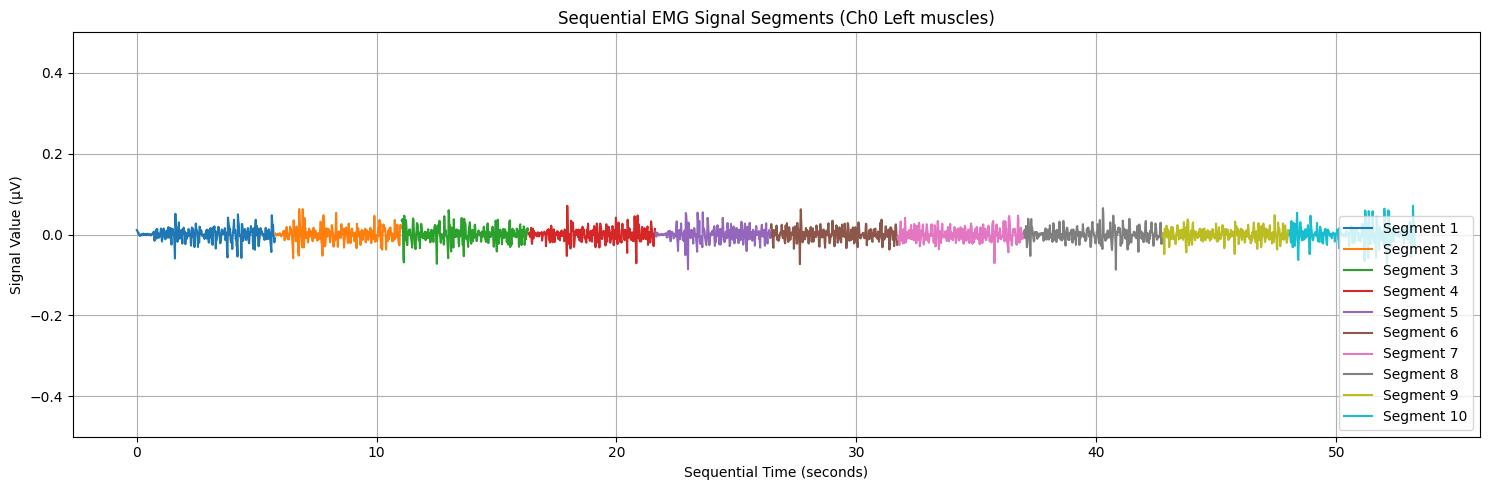

Smoothness: 0.014123100556235767
Variance: 0.000294354913796825


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Select the relevant streams (assume streams are already defined)
time_stamps_EMG = emg_stream["time_stamps"]
time_series_EMG_ch0 = notch_signal_0

time_stamps_Marker = marker_stream["time_stamps"]
time_series_Marker = marker_stream["time_series"]

# Find indices where Marker = 1
marker_on_indices = np.where(time_series_Marker == 1)[0]
marker_on_timestamps = time_stamps_Marker[marker_on_indices]

# Gather segments based on marker timing
marker_segments = []  # Store start and end times for each marker segment
time_series_marker = []  # Store filtered time series for each segment
time_stamps_marker = []  # Store filtered time stamps for each segment

for i, idx in enumerate(marker_on_indices[:-1]):
    current_time = time_stamps_Marker[idx]
    next_time = time_stamps_Marker[marker_on_indices[i + 1]]

    # Check if the marker timing is within the valid range
    if 4.8 < next_time - current_time <= 6:
        # Append valid marker segments as tuples
        marker_segments.append((current_time, next_time))

        # Extract time series and time stamps for this segment
        segment_indices = np.where((time_stamps_EMG >= current_time) & (time_stamps_EMG <= next_time))
        time_series_marker.append(time_series_EMG_ch0[segment_indices])
        time_stamps_marker.append(time_stamps_EMG[segment_indices])

# Create a single wide plot
plt.figure(figsize=(15, 5))  # Adjust width and height as needed

# Initialize an offset for aligning segments sequentially
offset = 0

# Loop through each segment and plot
for i, (start, end) in enumerate(marker_segments):
    # Use pre-stored segments
    segment_time = time_stamps_marker[i]
    segment_signal = time_series_marker[i]

    # Adjust the time stamps to align segments sequentially
    adjusted_time = segment_time - start + offset

    # Plot the data for the segment
    plt.plot(adjusted_time, segment_signal, label=f"Segment {i + 1}")

    # Update the offset for the next segment
    offset += end - start

# Add title and labels for the wide plot
print("ช่วงเวลาที่มี Marker ใหม่ภายในช่วง 5 วินาที:")
for start, end in marker_segments:
    delta = end - start
    print(f"Marker ที่ {start:.2f} วินาที -> Marker ที่ {end:.2f} วินาที ต่างกันอยู่ {delta:.2f} วินาที")

plt.title("Sequential EMG Signal Segments (Ch0 Left muscles)")
plt.ylim(-0.5, 0.5)
plt.xlabel("Sequential Time (seconds)")
plt.ylabel("Signal Value (μV)")  # Add units (microvolts)   
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Combine all segments into one array for analysis
marker_signal_ch0 = np.concatenate(time_series_marker)

cal_Smoothness_signal = np.mean(np.abs(np.diff(marker_signal_ch0)))
print(f"Smoothness: {cal_Smoothness_signal}")
cal_variance_signal = np.var(marker_signal_ch0)
print(f"Variance: {cal_variance_signal}")


# Plotgraph marker point (Ch2 Right muscle)

ช่วงเวลาที่มี Marker ใหม่ภายในช่วง 5 วินาที:
Marker ที่ 1530.26 วินาที -> Marker ที่ 1536.03 วินาที ต่างกันอยู่ 5.76 วินาที
Marker ที่ 1549.96 วินาที -> Marker ที่ 1555.24 วินาที ต่างกันอยู่ 5.28 วินาที
Marker ที่ 1570.13 วินาที -> Marker ที่ 1575.42 วินาที ต่างกันอยู่ 5.29 วินาที
Marker ที่ 1585.02 วินาที -> Marker ที่ 1590.31 วินาที ต่างกันอยู่ 5.29 วินาที
Marker ที่ 1600.88 วินาที -> Marker ที่ 1605.68 วินาที ต่างกันอยู่ 4.81 วินาที
Marker ที่ 1620.09 วินาที -> Marker ที่ 1625.38 วินาที ต่างกันอยู่ 5.29 วินาที
Marker ที่ 1634.99 วินาที -> Marker ที่ 1640.27 วินาที ต่างกันอยู่ 5.28 วินาที
Marker ที่ 1650.36 วินาที -> Marker ที่ 1656.12 วินาที ต่างกันอยู่ 5.76 วินาที
Marker ที่ 1665.25 วินาที -> Marker ที่ 1670.53 วินาที ต่างกันอยู่ 5.29 วินาที
Marker ที่ 1690.23 วินาที -> Marker ที่ 1695.51 วินาที ต่างกันอยู่ 5.28 วินาที


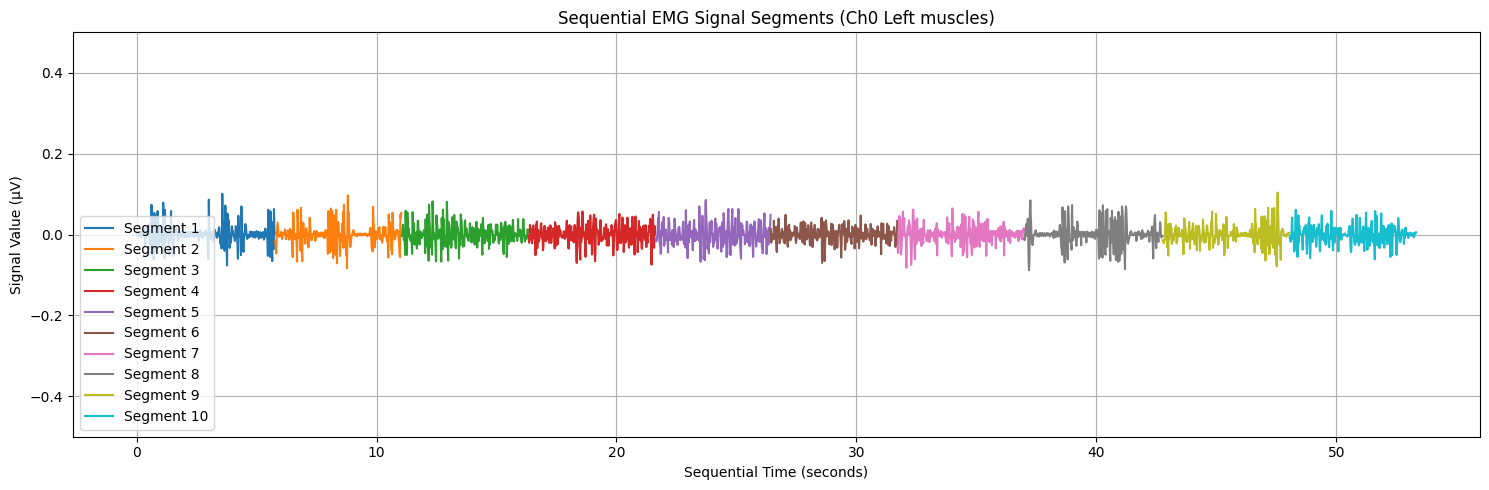

Smoothness: 0.019699569872213864
Variance: 0.0005527158052352444


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Select the relevant streams (assume streams are already defined)
time_stamps_EMG = emg_stream["time_stamps"]
time_series_EMG_ch2 = notch_signal_2

time_stamps_Marker = marker_stream["time_stamps"]
time_series_Marker = marker_stream["time_series"]

# Find indices where Marker = 1
marker_on_indices = np.where(time_series_Marker == 1)[0]
marker_on_timestamps = time_stamps_Marker[marker_on_indices]

# Gather segments based on marker timing
marker_segments = []  # Store start and end times for each marker segment
time_series_marker = []  # Store filtered time series for each segment
time_stamps_marker = []  # Store filtered time stamps for each segment

for i, idx in enumerate(marker_on_indices[:-1]):
    current_time = time_stamps_Marker[idx]
    next_time = time_stamps_Marker[marker_on_indices[i + 1]]

    # Check if the marker timing is within the valid range
    if 4.8 < next_time - current_time <= 6:
        # Append valid marker segments as tuples
        marker_segments.append((current_time, next_time))

        # Extract time series and time stamps for this segment
        segment_indices = np.where((time_stamps_EMG >= current_time) & (time_stamps_EMG <= next_time))
        time_series_marker.append(time_series_EMG_ch2[segment_indices])
        time_stamps_marker.append(time_stamps_EMG[segment_indices])

# Create a single wide plot
plt.figure(figsize=(15, 5))  # Adjust width and height as needed

# Initialize an offset for aligning segments sequentially
offset = 0

# Loop through each segment and plot
for i, (start, end) in enumerate(marker_segments):
    # Use pre-stored segments
    segment_time = time_stamps_marker[i]
    segment_signal = time_series_marker[i]

    # Adjust the time stamps to align segments sequentially
    adjusted_time = segment_time - start + offset

    # Plot the data for the segment
    plt.plot(adjusted_time, segment_signal, label=f"Segment {i + 1}")

    # Update the offset for the next segment
    offset += end - start

# Add title and labels for the wide plot
print("ช่วงเวลาที่มี Marker ใหม่ภายในช่วง 5 วินาที:")
for start, end in marker_segments:
    delta = end - start
    print(f"Marker ที่ {start:.2f} วินาที -> Marker ที่ {end:.2f} วินาที ต่างกันอยู่ {delta:.2f} วินาที")

plt.title("Sequential EMG Signal Segments (Ch0 Left muscles)")
plt.xlabel("Sequential Time (seconds)")
plt.ylabel("Signal Value (μV)")  # Add units (microvolts)   
plt.ylim(-0.5, 0.5)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

marker_signal_ch2 = np.concatenate(time_series_marker)

cal_Smoothness_signal = np.mean(np.abs(np.diff(marker_signal_ch2)))
print(f"Smoothness: {cal_Smoothness_signal}")
cal_variance_signal = np.var(marker_signal_ch2)
print(f"Variance: {cal_variance_signal}")

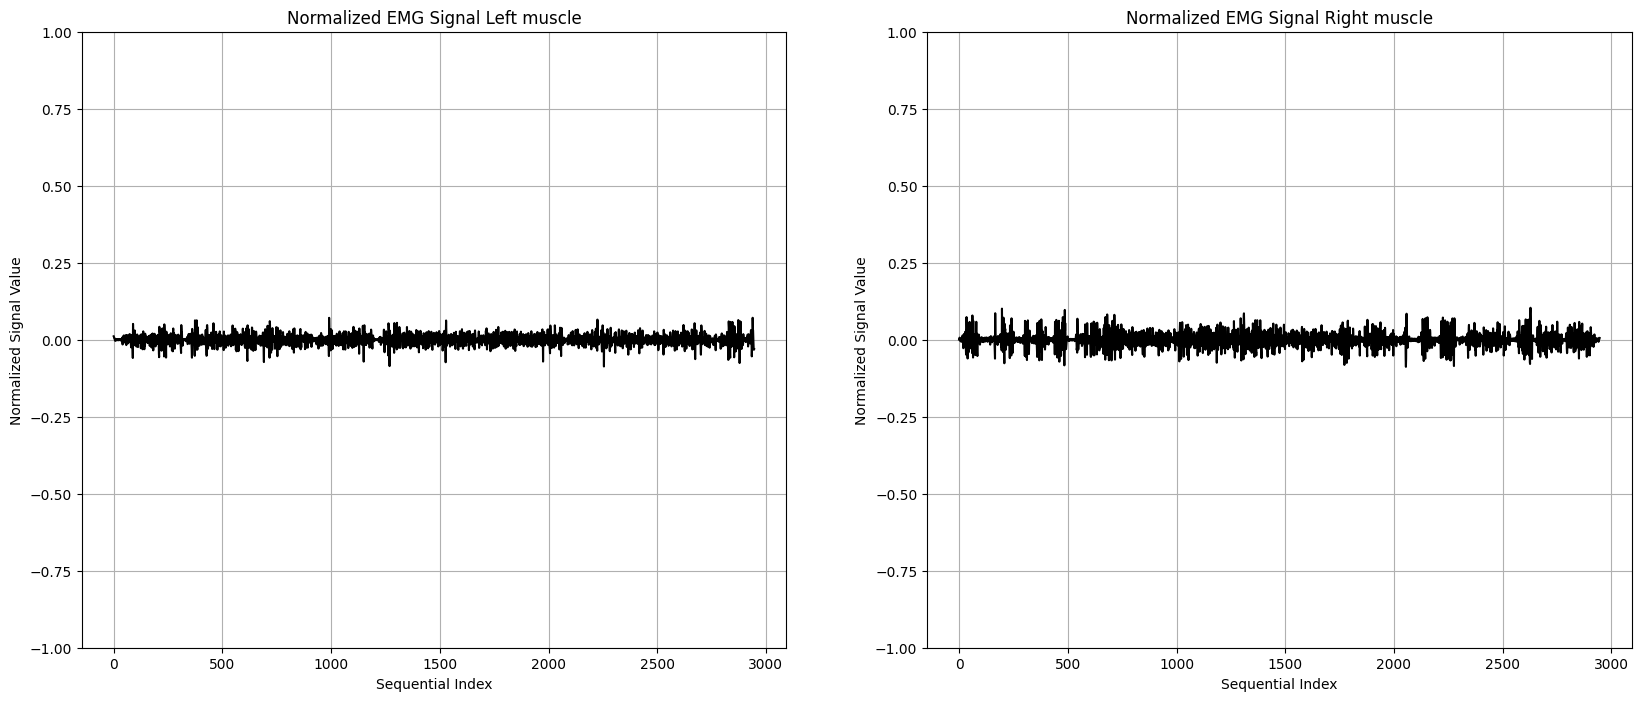

Smoothness_ch0  : 0.014123100556235767
Variance_ch0    : 0.000294354913796825


Smoothness_ch2  : 0.019699569872213864
Variance_ch2    : 0.0005527158052352444


In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig,axs = plt.subplots(1, 2, figsize=(20, 8), sharey=False)
axs[0].plot(np.arange(len(marker_signal_ch0)), marker_signal_ch0, label="Normalized EMG Signal Left muscle", color="black")
axs[0].set_title("Normalized EMG Signal Left muscle")
axs[0].set_xlabel("Sequential Index")
axs[0].set_ylabel("Normalized Signal Value")
axs[0].grid()
axs[0].set_ylim(-1, 1)

axs[1].plot(np.arange(len(marker_signal_ch2)), marker_signal_ch2, label="Normalized EMG Signal Right muscle", color="black")
axs[1].set_title("Normalized EMG Signal Right muscle")
axs[1].set_xlabel("Sequential Index")
axs[1].set_ylabel("Normalized Signal Value")
axs[1].grid()
axs[1].set_ylim(-1, 1)

# Hide the X-axis as you don't want to display it

plt.gca().axes.get_xaxis().set_visible(True) 
plt.show()

cal_Smoothness_ch0 = np.mean(np.abs(np.diff(marker_signal_ch0)))
print(f"Smoothness_ch0  : {cal_Smoothness_ch0}")
cal_variance_ch0 = np.var(marker_signal_ch0)
print(f"Variance_ch0    : {cal_variance_ch0}")

print('\n')
cal_Smoothness_ch2 = np.mean(np.abs(np.diff(marker_signal_ch2)))
print(f"Smoothness_ch2  : {cal_Smoothness_ch2}")
cal_variance_ch2 = np.var(marker_signal_ch2) 
print(f"Variance_ch2    : {cal_variance_ch2}")


# __________________________________________________________________________________________

# Normalization and output result

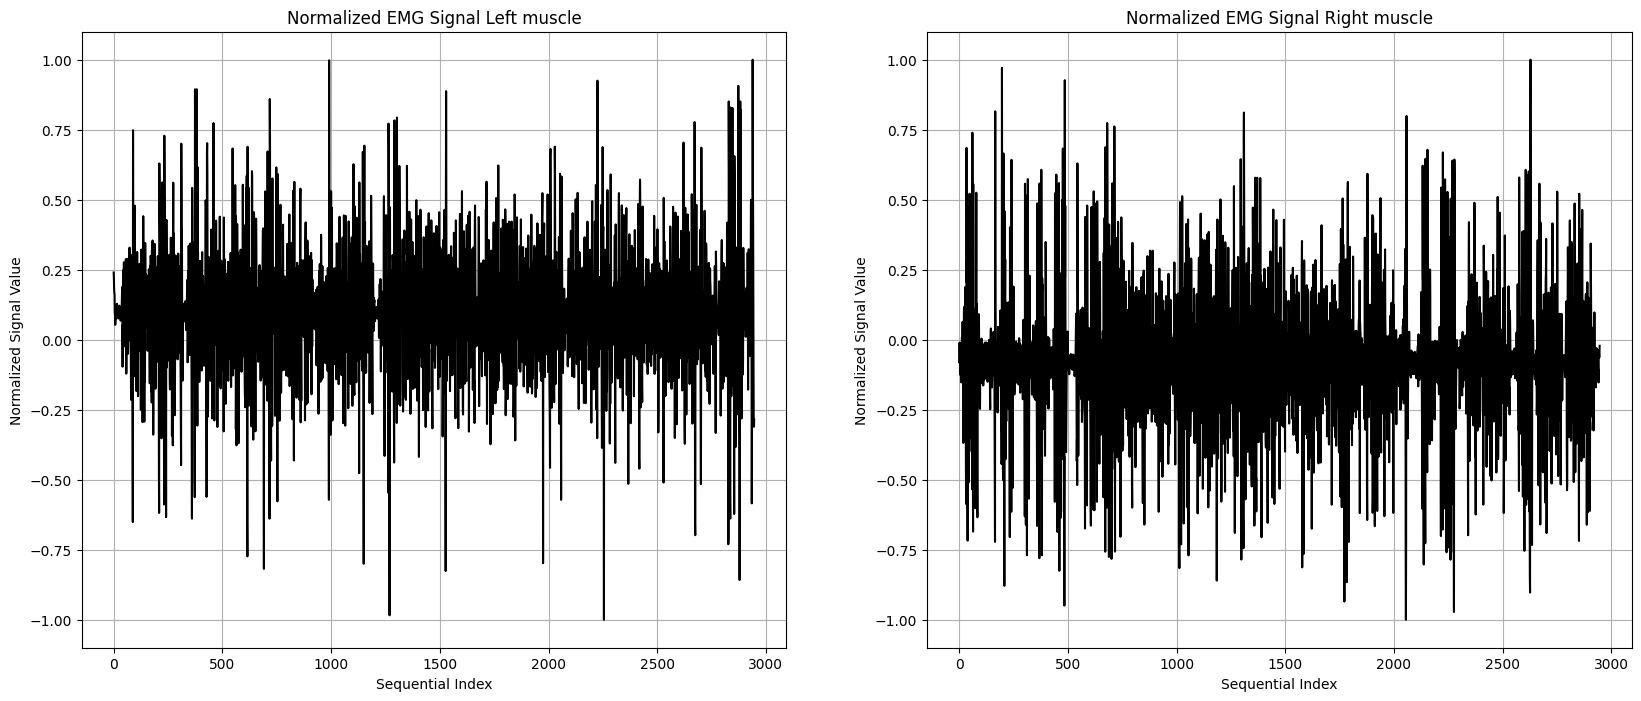

Smoothness_ch0  : 0.17855203053166432
Variance_ch0    : 0.04704795753267641


Smoothness_ch2  : 0.20546169995517474
Variance_ch2    : 0.06012431623354762


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def normalize_data(data, new_min, new_max):
    data = np.array(data)  # Ensure input is a NumPy array
    old_min = np.min(data)
    old_max = np.max(data)

    # Prevent division by zero if data has constant value
    if old_min == old_max:
        return np.full(data.shape, new_min)  # Return new_min for all elements

    # Perform normalization
    normalized_data = ((data - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min
    return normalized_data

# Plot with normalized data and custom x-axis as a sequence
normalized_signal_0 = normalize_data(marker_signal_ch0, -1, 1)
normalized_signal_2 = normalize_data(marker_signal_ch2, -1, 1)

fig,axs = plt.subplots(1, 2, figsize=(20, 8), sharey=False)
axs[0].plot(np.arange(len(marker_signal_ch0)), normalized_signal_0, label="Normalized EMG Signal Left muscle", color="black")
axs[0].set_title("Normalized EMG Signal Left muscle")
axs[0].set_xlabel("Sequential Index")
axs[0].set_ylabel("Normalized Signal Value")
axs[0].grid()

axs[1].plot(np.arange(len(marker_signal_ch2)), normalized_signal_2, label="Normalized EMG Signal Right muscle", color="black")
axs[1].set_title("Normalized EMG Signal Right muscle")
axs[1].set_xlabel("Sequential Index")
axs[1].set_ylabel("Normalized Signal Value")
axs[1].grid()

# Hide the X-axis as you don't want to display it
plt.gca().axes.get_xaxis().set_visible(True) 
plt.show()

cal_Smoothness_ch0 = np.mean(np.abs(np.diff(normalized_signal_0)))
print(f"Smoothness_ch0  : {cal_Smoothness_ch0}")
cal_variance_ch0 = np.var(normalized_signal_0)
print(f"Variance_ch0    : {cal_variance_ch0}")

print('\n')
cal_Smoothness_ch2 = np.mean(np.abs(np.diff(normalized_signal_2)))
print(f"Smoothness_ch2  : {cal_Smoothness_ch2}")
cal_variance_ch2 = np.var(normalized_signal_2)
print(f"Variance_ch2    : {cal_variance_ch2}")


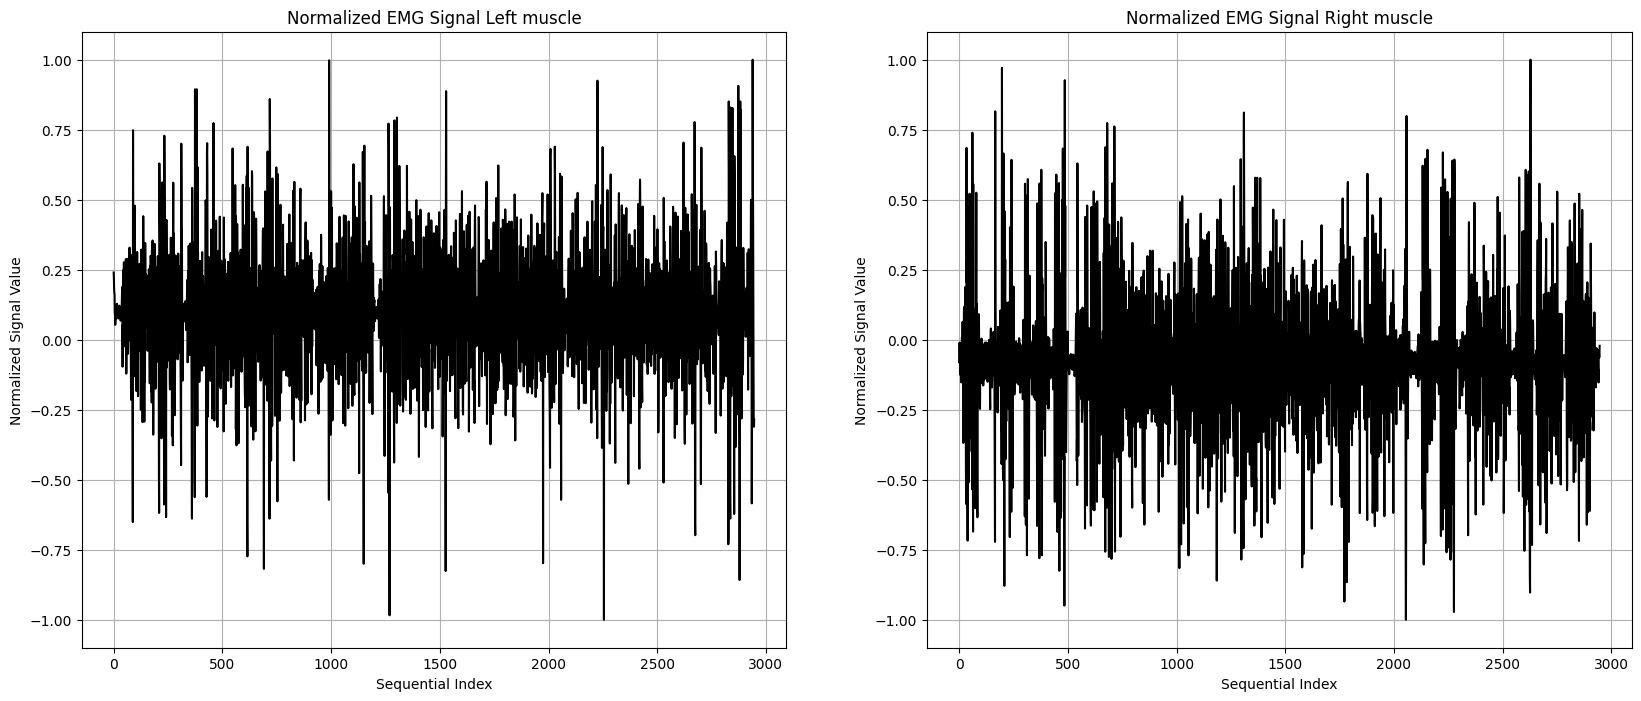

Smoothness_ch0  : 0.17855203053166432
Variance_ch0    : 0.04704795753267641


Smoothness_ch2  : 0.20546169995517474
Variance_ch2    : 0.06012431623354762


In [10]:
import matplotlib.pyplot as plt
import numpy as np

def normalize_data(data, new_min, new_max):
    data = np.array(data)  # Ensure input is a NumPy array
    old_min = np.min(data)
    old_max = np.max(data)

    # Prevent division by zero if data has constant value
    if old_min == old_max:
        return np.full(data.shape, new_min)  # Return new_min for all elements

    # Perform normalization
    normalized_data = ((data - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min
    return normalized_data

# Plot with normalized data and custom x-axis as a sequence
normalized_signal_0 = normalize_data(marker_signal_ch0, -1, 1)
normalized_signal_2 = normalize_data(marker_signal_ch2, -1, 1)

fig,axs = plt.subplots(1, 2, figsize=(20, 8), sharey=False)
axs[0].plot(np.arange(len(marker_signal_ch0)), normalized_signal_0, label="Normalized EMG Signal Left muscle", color="black")
axs[0].set_title("Normalized EMG Signal Left muscle")
axs[0].set_xlabel("Sequential Index")
axs[0].set_ylabel("Normalized Signal Value")
axs[0].grid()

axs[1].plot(np.arange(len(marker_signal_ch2)), normalized_signal_2, label="Normalized EMG Signal Right muscle", color="black")
axs[1].set_title("Normalized EMG Signal Right muscle")
axs[1].set_xlabel("Sequential Index")
axs[1].set_ylabel("Normalized Signal Value")
axs[1].grid()

# Hide the X-axis as you don't want to display it
plt.gca().axes.get_xaxis().set_visible(True) 
plt.show()

cal_Smoothness_ch0 = np.mean(np.abs(np.diff(normalized_signal_0)))
print(f"Smoothness_ch0  : {cal_Smoothness_ch0}")
cal_variance_ch0 = np.var(normalized_signal_0)
print(f"Variance_ch0    : {cal_variance_ch0}")

print('\n')
cal_Smoothness_ch2 = np.mean(np.abs(np.diff(normalized_signal_2)))
print(f"Smoothness_ch2  : {cal_Smoothness_ch2}")
cal_variance_ch2 = np.var(normalized_signal_2)
print(f"Variance_ch2    : {cal_variance_ch2}")
